# 

# 01. Contents

In [4]:
# This script contains the following contents

## Step 1 - Import Latest InstaCart Merged Data
## Step 2 - Consider Any Security Implications for this Data
## Step 3(A) - Create Regional Segmentation of the Data
## Step 3(B) - Determine Spending Habits by Region
## Step 4 - Excluding Customers with < 5 orders
## Step 5 - Create a profiling variable
## Step 6 - Create visualization to show distribution of profiles
## Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage and frequency expenditure
## Step 8 - Compare profiles with regions and departments and identify any links
## Step 9 - Produce suitable charts
## Step 10 - Finalize script and export final data set

# 02. Importing Libraries

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [6]:
# create a path

path = r'C:\\Users\\Richard\\Desktop\\Instacart Basket Analysis'

In [7]:
# importing data

ords_prods_merge_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_all.pkl'))

In [8]:
ords_prods_merge_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,frequency_flag,first_name,last_name,Gender,STATE,Age,number_of_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


# 03. Analysis

In [9]:
#2 Consider security implications and address any PII

ords_prods_merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int8    
 4   orders_day_of_week      int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
 7   first_order             bool    
 8   product_id              int64   
 9   add_to_cart_order       int8    
 10  reordered               int8    
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int8    
 20  loyalty_flag            object  
 21  averag

In [10]:
# The data contains PII such as first and last names, income, marital status, and state of residence. It was decided to remove the first and last name columns as they are not necessary for this analysis and it will protect the personal information of the people involved.

In [11]:
# dropping the first_name and last_name columns

ords_prods_all = ords_prods_merge_all.drop(columns = ['first_name', 'last_name'])

In [12]:
# Check to make sure the columns were removed

ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int8    
 4   orders_day_of_week      int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
 7   first_order             bool    
 8   product_id              int64   
 9   add_to_cart_order       int8    
 10  reordered               int8    
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int8    
 20  loyalty_flag            object  
 21  averag

In [13]:
#3a. Create a regional segmentation of the data, create a regional column based on the state column.

In [14]:
# Creating a region column using loc for mapping

ords_prods_all['region'] = 'West'
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region',] = 'Northeast'
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region',] = 'Midwest'
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region',] = 'South'

In [15]:
# Checking the result

ords_prods_all.head(25)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,median_frequency,frequency_flag,Gender,STATE,Age,number_of_dependants,fam_status,income,_merge,region
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
2,473747,1,prior,3,3,12,21.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
4,431534,1,prior,5,4,15,28.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
5,3367565,1,prior,6,2,7,19.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
6,550135,1,prior,7,1,9,20.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
7,3108588,1,prior,8,1,14,14.0,False,196,2,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
8,2295261,1,prior,9,1,16,0.0,False,196,4,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
9,2550362,1,prior,10,4,8,30.0,False,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South


In [16]:
ords_prods_all['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
#3b. Determine spending habbits based on region using the 'spender_flag' column

In [18]:
# Create a subset of the data to determine spending habbits

region_sample = ords_prods_all[:1000000]

In [19]:
# Check the output of the 'spender_flag'

region_sample['spender_flag'].head()

0    Low spender
1    Low spender
2    Low spender
3    Low spender
4    Low spender
Name: spender_flag, dtype: object

In [20]:
# Create a crosstab of 'region' and 'spender_flag'

region_spending = pd.crosstab(region_sample['region'], region_sample['spender_flag'])

In [21]:
region_spending.head()

spender_flag,High_spender,Low spender
region,,
Midwest,9853,209182
Northeast,9819,177451
South,13054,334778
West,11617,234246


In [22]:
region_sample['spender_flag'].value_counts()

spender_flag
Low spender     955657
High_spender     44343
Name: count, dtype: int64

In [23]:
# There does not appear to be a large correlation between the region and spending habbits. When looking at the size of the different regions, the South has the most customers, followeed by the West, Midwest, and Northeast. The spending habbits for the same follows this with the most for the high and low spender being in the south, followeed by the west, midwest, and northeast.

In [24]:
#4. Create an exclusion flag for low-activity customers with less than 5 orders. 

ords_prods_all['low_activity_flag'] = ords_prods_all['max_order'] < 5

In [25]:
# exclude low activity customers from the data

df_low_activity_flag = ords_prods_all[~ords_prods_all['low_activity_flag']]

In [26]:
df_low_activity_flag.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,frequency_flag,Gender,STATE,Age,number_of_dependants,fam_status,income,_merge,region,low_activity_flag
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False


In [27]:
# Verify the exclusion of customers with less than 5 orders

df_low_activity_flag['low_activity_flag'].value_counts()

low_activity_flag
False    30964564
Name: count, dtype: int64

In [28]:
# Save the dataframe with low activity exclusion flag

df_low_activity_flag.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'less_than_5_order_customers.pkl'))

In [29]:
#5  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [30]:
# Creating a subset 70/30 split to help with memory issues

dev = np.random.rand(len(ords_prods_all)) <=0.7

In [31]:
# Store 70% of the sample in the dataframe big

big = ords_prods_all[dev]

In [32]:
# Store 30% of the sample in the dataframe small

small = ords_prods_all[~dev]

In [33]:
len(ords_prods_all)

32404859

In [34]:
len(big) + len(small)

32404859

In [35]:
# Creating an age variable

def age_label(row):
        if row['Age'] <= 24:
            return 'young-adult'
        elif 24 < row['Age'] <= 44:
            return 'adult'
        elif 44 < row['Age'] < 65:
            return 'middle-age'
        else: return 'senior'

In [36]:
small['age_group'] = small.apply(age_label, axis=1)

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\3545808766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['age_group'] = small.apply(age_label, axis=1)


In [37]:
# Check the age_group values 

small['age_group'].value_counts()

age_group
middle-age     3041603
adult          3036740
senior         2570720
young-adult    1071306
Name: count, dtype: int64

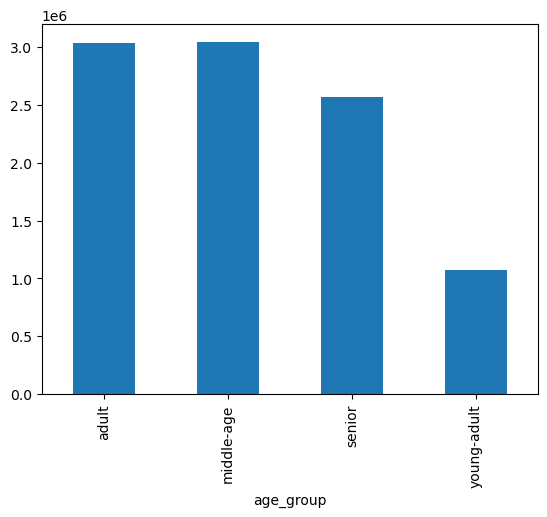

In [38]:
# Create a bar chart to show the difference in values for the different age groups

bar_age_group = small['age_group'].value_counts().sort_index().plot.bar()

In [39]:
# Save the visualization

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [40]:
# A majority of customers fall into the adult and middle-age groups. The young-adult age group makes up a third of the number of customers of the other age groups. This suggest it may be beneficial to target marketing towards the young-adult age group to increase customer numbers.

In [41]:
# Create an income variable

small['income'].describe()

count    9.720369e+06
mean     9.943002e+04
std      4.303482e+04
min      2.590300e+04
25%      6.699700e+04
50%      9.660800e+04
75%      1.278940e+05
max      5.939010e+05
Name: income, dtype: float64

In [42]:
# Create an income variable using customers income value
# Define thresholds for income tiers
    
low_income_threshold = 50000
mid_income_threshold = 100000
high_income_threshold = 150000

In [43]:
# Create a new column 'income_category' based on the income column

small['income_category'] = pd.cut(
    small['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['Low Income', 'Middle Income', 'High Income'],
    include_lowest=True)

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\3664425738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['income_category'] = pd.cut(


In [44]:
small.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,STATE,Age,number_of_dependants,fam_status,income,_merge,region,low_activity_flag,age_group,income_category
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Alabama,31,3,married,40423,both,South,False,adult,Low Income
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Alabama,31,3,married,40423,both,South,False,adult,Low Income
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Alabama,31,3,married,40423,both,South,False,adult,Low Income
15,431534,1,prior,5,4,15,28.0,False,12427,2,...,Alabama,31,3,married,40423,both,South,False,adult,Low Income
16,3367565,1,prior,6,2,7,19.0,False,12427,2,...,Alabama,31,3,married,40423,both,South,False,adult,Low Income


In [45]:
small['income_category'].value_counts()

income_category
Middle Income    7427102
High Income      1215121
Low Income       1078146
Name: count, dtype: int64

Text(0.5, 1.0, 'Income Category Distribution')

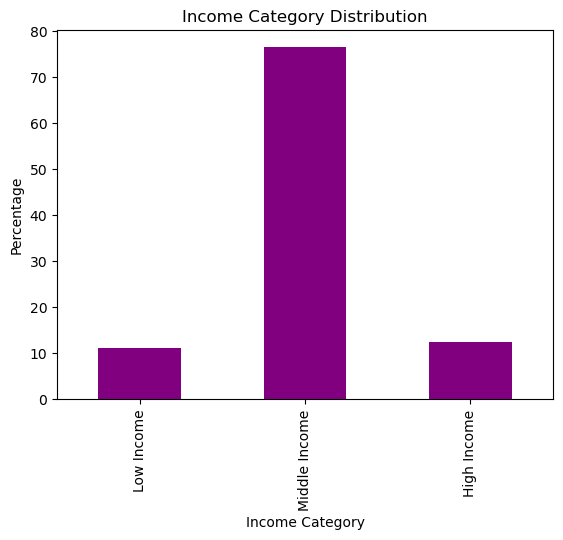

In [46]:
# Plot the percentage distribution of income categories
    
percentage_distribution = (small['income_category'].value_counts(normalize=True) * 100).sort_index()
percentage_distribution.plot.bar(color=['purple'])
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Category Distribution')

Text(0.5, 1.0, 'Income Category Distribution')

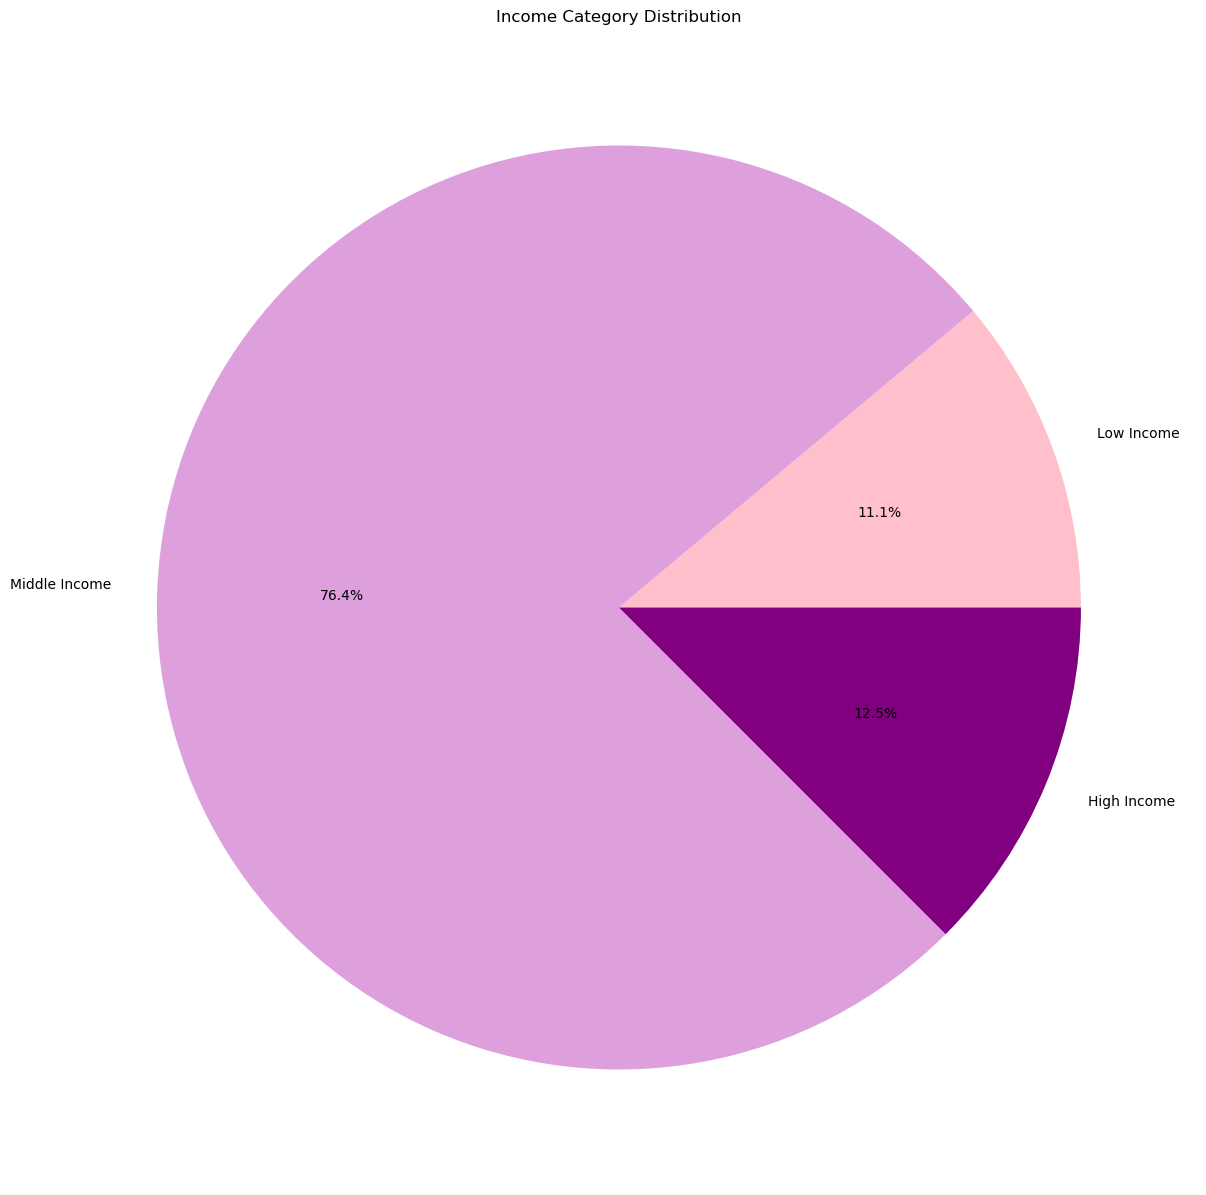

In [49]:
# Create Pie Chart

plt.figure(figsize=(15, 15))
income_pie=plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors = ['pink', 'plum', 'purple'])
plt.title('Income Category Distribution')

In [50]:
# Save pie chart

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_category_pie.png')) 

<Figure size 640x480 with 0 Axes>

In [51]:
# Creating a dependant flag to indicate whether the customer has dependants

small['avg_dependant'] = small.groupby(['user_id'])['number_of_dependants'].transform('mean')

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\3448138481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['avg_dependant'] = small.groupby(['user_id'])['number_of_dependants'].transform('mean')


In [52]:
small.loc[small['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\4194016001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[small['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'


In [53]:
small.loc[small['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'

In [54]:
small['depend_flag'].value_counts(dropna = False)

depend_flag
With Dependants       7291727
Without Dependants    2428642
Name: count, dtype: int64

In [55]:
# Convert data-type to string in order to allow for concatination in next step

small['income_category'] = small['income_category'].astype(str)
small['depend_flag'] = small['depend_flag'].astype(str)

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\1296920541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['income_category'] = small['income_category'].astype(str)
C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\1296920541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['depend_flag'] = small['depend_flag'].astype(str)


In [56]:
# Create Customer Profile Variable by concatinating income_category, depend_flag, and age_group
    
small['customer_profile'] = small['age_group'] + '_' + small['income_category'] + '_' + small['depend_flag']

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\3755342941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['customer_profile'] = small['age_group'] + '_' + small['income_category'] + '_' + small['depend_flag']


In [57]:
# Check the output

small.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,fam_status,income,_merge,region,low_activity_flag,age_group,income_category,avg_dependant,depend_flag,customer_profile
2,473747,1,prior,3,3,12,21.0,False,196,1,...,married,40423,both,South,False,adult,Low Income,3.0,With Dependants,adult_Low Income_With Dependants
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,married,40423,both,South,False,adult,Low Income,3.0,With Dependants,adult_Low Income_With Dependants
4,431534,1,prior,5,4,15,28.0,False,196,1,...,married,40423,both,South,False,adult,Low Income,3.0,With Dependants,adult_Low Income_With Dependants
15,431534,1,prior,5,4,15,28.0,False,12427,2,...,married,40423,both,South,False,adult,Low Income,3.0,With Dependants,adult_Low Income_With Dependants
16,3367565,1,prior,6,2,7,19.0,False,12427,2,...,married,40423,both,South,False,adult,Low Income,3.0,With Dependants,adult_Low Income_With Dependants


In [58]:
# Check the shape

small.shape

(9720369, 39)

In [59]:
# Check the value counts for customer profile

small['customer_profile'].value_counts()

customer_profile
adult_Middle Income_With Dependants             1845669
middle-age_Middle Income_With Dependants        1646123
senior_Middle Income_With Dependants            1409039
young-adult_Middle Income_With Dependants        680152
adult_Middle Income_Without Dependants           616825
middle-age_Middle Income_Without Dependants      553616
senior_Middle Income_Without Dependants          461823
middle-age_High Income_With Dependants           432497
senior_High Income_With Dependants               359062
adult_Low Income_With Dependants                 320399
young-adult_Middle Income_Without Dependants     213855
middle-age_Low Income_With Dependants            194576
senior_Low Income_With Dependants                166602
middle-age_High Income_Without Dependants        148633
young-adult_Low Income_With Dependants           125260
senior_High Income_Without Dependants            123384
adult_Low Income_Without Dependants              111964
adult_High Income_With Dependan

In [60]:
#customer profile and sales

customer_profile_sale = small.groupby('customer_profile')['prices'].sum()

In [61]:
customer_profile_sale_sorted = customer_profile_sale.sort_values(ascending=False)

In [62]:
colors = plt.cm.Reds(np.linspace(0.8, 0.3, len(customer_profile_sale_sorted)))

In [63]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

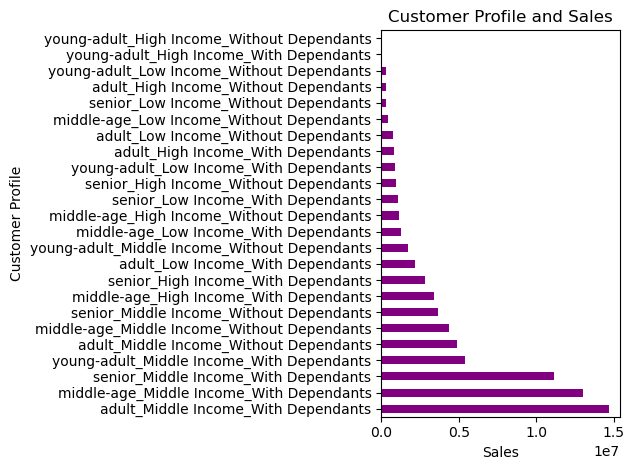

In [64]:
bar_customer_profile = customer_profile_sale_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', color = 'purple')
plt.tight_layout()

In [65]:
# Save image

bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

In [66]:
# Ordering habits
# Orders interval among customers profile

customer_profile_order = small.groupby('customer_profile')['days_since_prior_order'].mean()

In [67]:
customer_profile_sorted = customer_profile_order.sort_values(ascending=True)

In [68]:
colors = plt.cm.Purples(np.linspace(0.3, 0.8, len(customer_profile_sorted)))

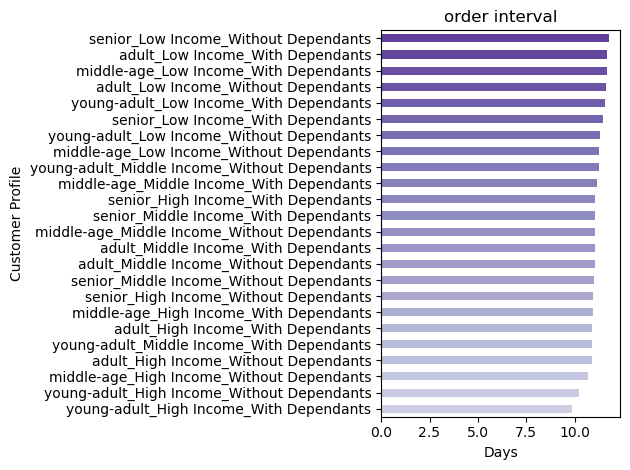

In [69]:
bar_customer_profile_orderintervals = customer_profile_sorted.plot.barh(title = 'order interval', xlabel = 'Days', ylabel = 'Customer Profile', color = colors)
plt.tight_layout()

In [70]:
# Save the image

bar_customer_profile_orderintervals.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_orderintervals.png'))

In [71]:
# Determine if there are certain hours of the day orders are placed based off the customer profile

order_hour_of_day = small.groupby(['customer_profile', 'order_hour_of_day']).size().unstack()

In [72]:
# Calculate the mode for each 'customer_profile'

order_hour_day_mode = small.groupby('customer_profile')['order_hour_of_day'].apply(lambda x: x.mode().iloc[0])

In [73]:
# Create a DataFrame for plotting

plot_data = pd.DataFrame({'customer_profile': order_hour_day_mode.index, 'mode_order_hour_of_day': order_hour_day_mode.values})

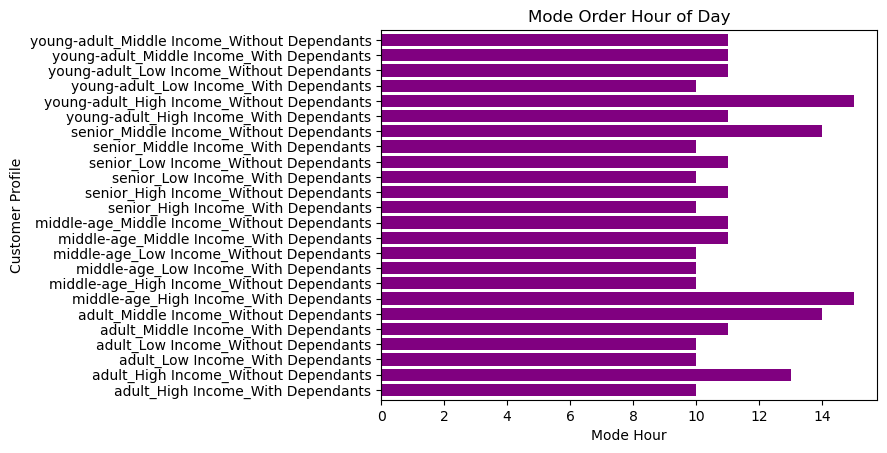

In [74]:
# Plotting the horizontal bar chart for mode

ax = plot_data.plot(kind='barh', x='customer_profile', y='mode_order_hour_of_day', color='purple', legend=False, title='Mode Order Hour of Day', xlabel='Mode Hour', ylabel='Customer Profile', width=0.8)

In [75]:
# Adjusting the size of the plot

fig = plt.gcf()
fig.set_size_inches(10, 6)

<Figure size 1000x600 with 0 Axes>

In [76]:
# Display the plot

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

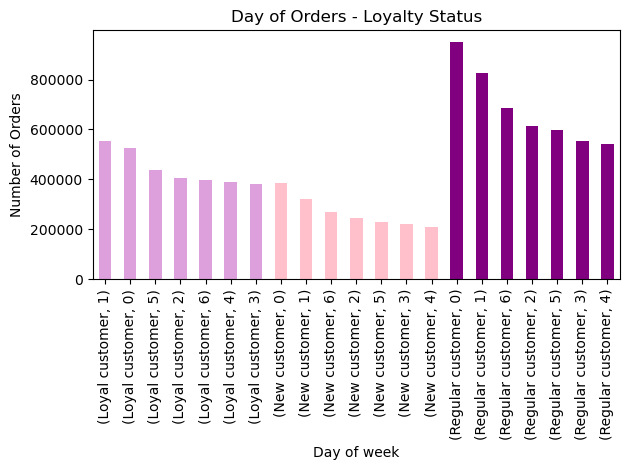

In [77]:
bar_day_loyalty = small.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color=['plum'] * 7 + ['pink'] * 7 + ['purple'] * 7)
plt.tight_layout()

In [78]:
# Save figure

bar_day_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_interval.png'))

In [79]:
# Departments and Orders
# Mapping of department IDs to department names

department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    }

In [80]:
# Create the 'department_name' column
    
small['department_name'] = small['department_id'].map(department_mapping).fillna('missing')

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\1967063769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department_name'] = small['department_id'].map(department_mapping).fillna('missing')


In [81]:
small.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,income,_merge,region,low_activity_flag,age_group,income_category,avg_dependant,depend_flag,customer_profile,department_name
2,473747,1,prior,3,3,12,21.00,False,196,1,...,40423,both,South,False,adult,Low Income,3.00,With Dependants,adult_Low Income_With Dependants,beverages
3,2254736,1,prior,4,4,7,29.00,False,196,1,...,40423,both,South,False,adult,Low Income,3.00,With Dependants,adult_Low Income_With Dependants,beverages
4,431534,1,prior,5,4,15,28.00,False,196,1,...,40423,both,South,False,adult,Low Income,3.00,With Dependants,adult_Low Income_With Dependants,beverages
15,431534,1,prior,5,4,15,28.00,False,12427,2,...,40423,both,South,False,adult,Low Income,3.00,With Dependants,adult_Low Income_With Dependants,snacks
16,3367565,1,prior,6,2,7,19.00,False,12427,2,...,40423,both,South,False,adult,Low Income,3.00,With Dependants,adult_Low Income_With Dependants,snacks


In [82]:
# Create a dataframe to group the data by 'department_name' and 'loyalty_flag'

df_small_grouped = small.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [83]:
df_small_grouped = df_small_grouped.sort_values(by = 'Regular customer', ascending = False)

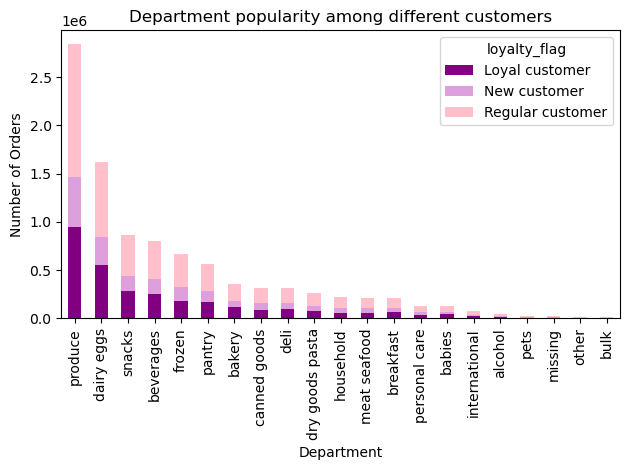

In [84]:
# Plot the data using a bar chart

colors = ['purple', 'plum','pink']
bar_dep_grouped = df_small_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department popularity among different customers')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [85]:
# Save figure
    
bar_dep_grouped.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-Loyalty.png'))

In [86]:
#7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [87]:
# Group by customer_id and calculate max, mean, and min

profile_aggregated = small.groupby('user_id').agg({
'Age': ['max', 'mean', 'min'],
'number_of_dependants': ['max', 'mean', 'min']
}).reset_index()

In [88]:
# Rename columns for clarity
   
profile_aggregated.columns = ['user_id',
'max_age', 'mean_age', 'min_age',
'max_dependants', 'mean_dependants', 'min_dependants']

In [89]:
# Display the aggregated DataFrame
   
print(profile_aggregated)

       user_id  max_age  mean_age  min_age  max_dependants  mean_dependants  \
0            1       31     31.00       31               3             3.00   
1           10       34     34.00       34               2             2.00   
2          100       64     64.00       64               2             2.00   
3         1000       25     25.00       25               1             1.00   
4        10000       33     33.00       33               0             0.00   
...        ...      ...       ...      ...             ...              ...   
205491   99995       43     43.00       43               3             3.00   
205492   99996       41     41.00       41               1             1.00   
205493   99997       27     27.00       27               1             1.00   
205494   99998       38     38.00       38               3             3.00   
205495   99999       40     40.00       40               1             1.00   

        min_dependants  
0                    3  
1

In [90]:
#8  Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [91]:
# Create a dataframe to group the data by 'department_name' and 'region'

df_dep_region= small.groupby(['department_name', 'region']).size().unstack()

In [92]:
df_dep_region = df_dep_region.sort_values(by = 'South', ascending = False)

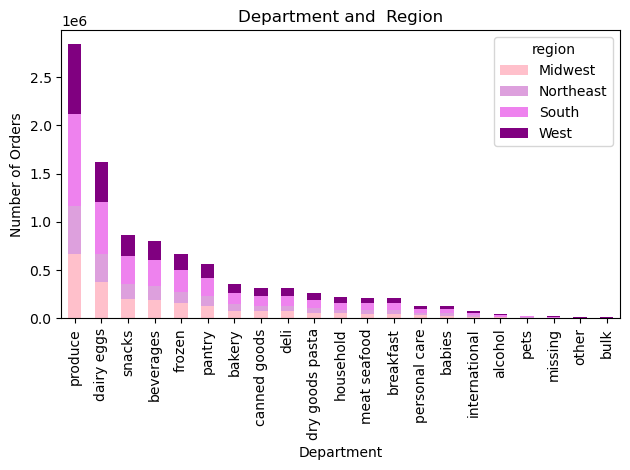

In [93]:
# Plot the data using a bar chart

colors = ['pink', 'plum', 'violet', 'purple']
bar_dep_region =df_dep_region.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department and  Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [94]:
# Save figure

bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_stacked.png'))

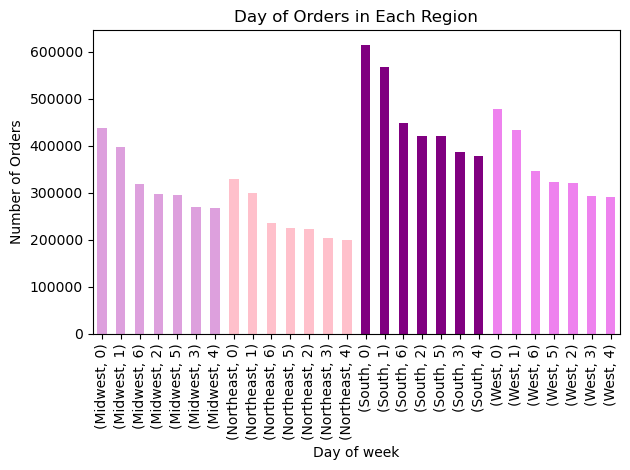

In [95]:
# difference of order behavior among regions

bar_day_region = small.groupby('region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders in Each Region', xlabel = 'Day of week', ylabel = 'Number of Orders',color=['plum'] * 7 + ['pink'] * 7+['purple'] * 7 + ['violet'] * 7)
plt.tight_layout()

In [96]:
# Save figure

bar_day_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-stacked.png'))

In [97]:
# Observing products populity among customers

In [98]:
# Products Poularity
# customer profile and sales

product_pop = small.groupby('product_name')['order_number'].sum()

In [99]:
product_pop_sort= product_pop.sort_values(ascending=False)

In [100]:
colors = plt.cm.Purples(np.linspace(0.8, 0.3, len(product_pop_sort)))

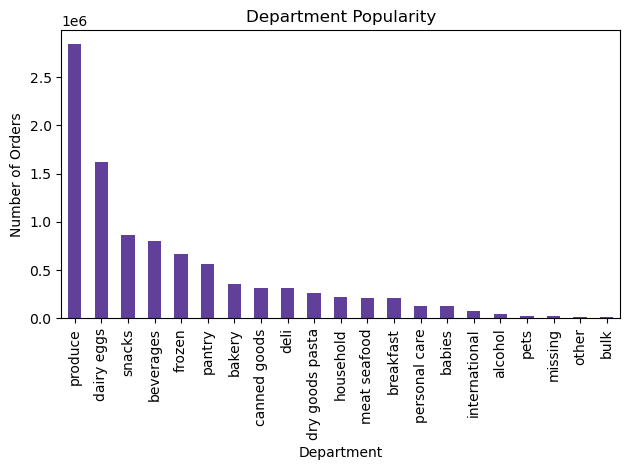

In [101]:
bar_depart_pop = small['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = colors)
plt.tight_layout()

In [102]:
# Save figure

bar_depart_pop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-popularity.png'))

In [103]:
# Additional visualizations

In [104]:
# Calculate the counts of each department

department_counts = small['department_name'].value_counts()

In [105]:
# Identify the top 10 departments

top_departments = department_counts.head(5).index

In [106]:
# Group other departments into "Other"

small['department_grouped'] = small['department_name'].where(small['department_name'].isin(top_departments))

C:\Users\Richard\AppData\Local\Temp\ipykernel_17600\89300451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department_grouped'] = small['department_name'].where(small['department_name'].isin(top_departments))


In [107]:
# Calculate the percentage of each department group

department_percentage = small['department_grouped'].value_counts(normalize=True) * 100

Text(0.5, 1.0, 'Top 5 Department Popularity')

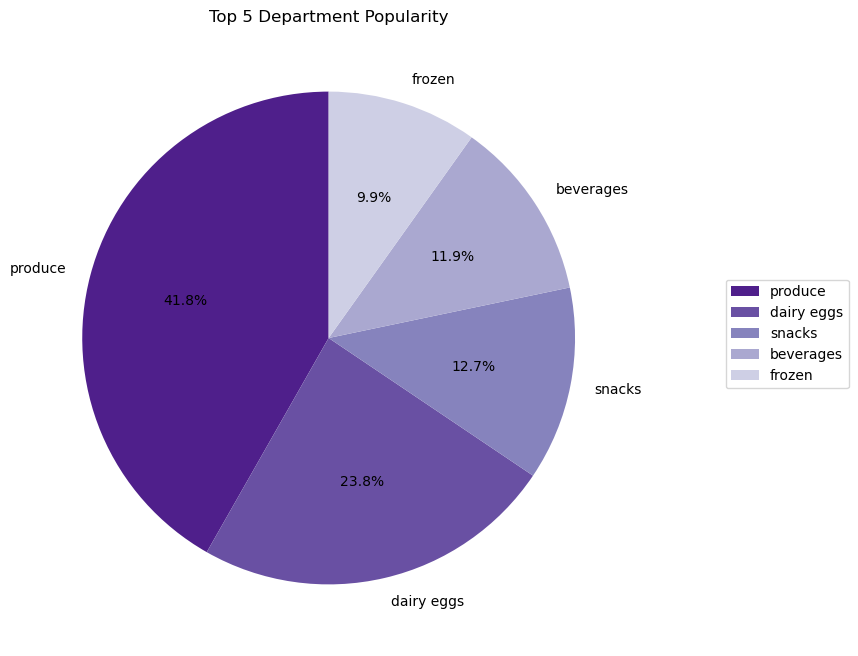

In [108]:
# Define shades of red
    
shades_of_red = plt.cm.Purples(np.linspace(0.9, 0.3, len(department_percentage)))
# Create a pie chart with shades of red

fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=shades_of_red)
# Add a legend with shades of red
ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc='center left', fontsize=10, bbox_transform=plt.gcf().transFigure)
# Set the title
plt.title('Top 5 Department Popularity')        

In [109]:
# Save figure

save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')

In [110]:
# Loyalty brand distribution
# Calculate the frequency distribution of 'loyalty_flag'

loyalty_distribution = small['loyalty_flag'].value_counts()

Text(0.5, 1.0, 'Loyalty Brand Distribution')

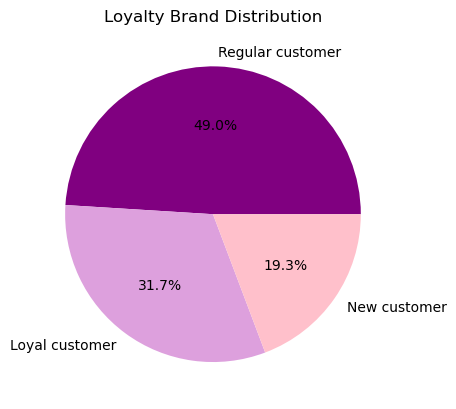

In [111]:
# Plot the pie chart

plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['purple', 'plum', 'pink'])
plt.title('Loyalty Brand Distribution')

In [112]:
# Save figure

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution.png'))

<Figure size 640x480 with 0 Axes>

C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


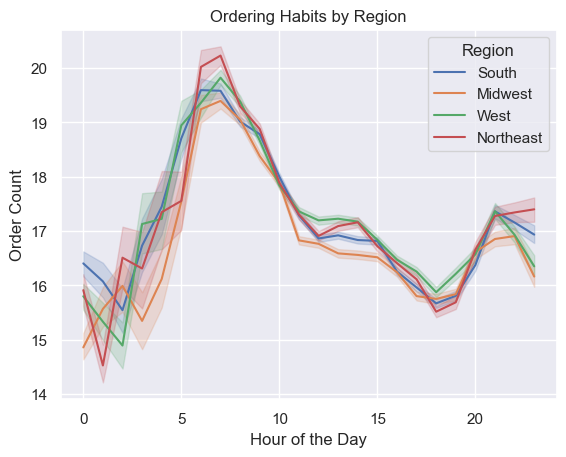

In [113]:
# Line chart using seaborn

sns.set_theme(style='darkgrid')  
line_chart = sns.lineplot(data=small, x='order_hour_of_day', y='order_number', hue='region',)
# Set the title and labels
plt.title('Ordering Habits by Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
# Display the legend
plt.legend(title='Region', loc='upper right')

In [114]:
# Save figure

line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region-orde.png'))

In [115]:
# making groups and normalizing the result

spending_by_region = small.groupby('region')['spender_flag'].value_counts(normalize=True).unstack() * 100

In [116]:
# defining colors

colors = ['purple', 'pink']

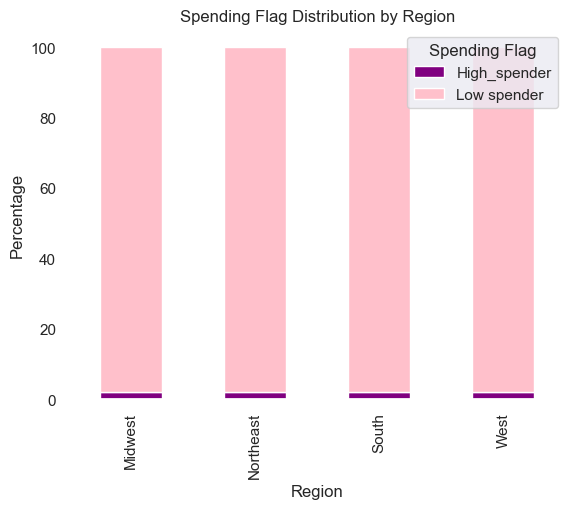

In [117]:
# Plotting the bar chart

ax = spending_by_region.plot(kind='bar', stacked=True, color=colors)
fig = plt.gcf()
ax.set_facecolor('white')
# Adding labels and title

ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Spending Flag Distribution by Region')
# Display the legend

ax.legend(title='Spending Flag', loc='upper right')

In [118]:
# Save figure

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending region.png'), bbox_inches='tight', pad_inches=0.1)

<Figure size 640x480 with 0 Axes>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

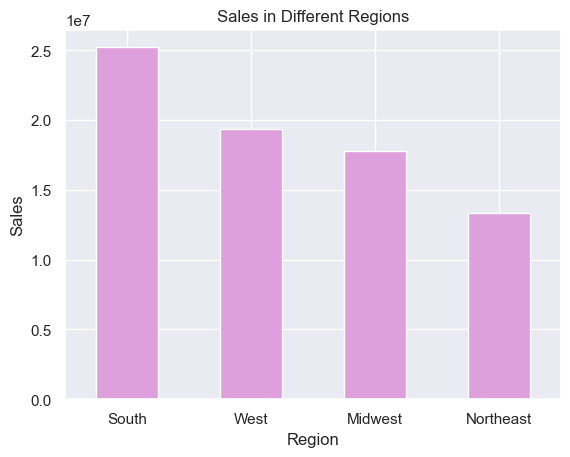

In [119]:
# purchased product prices in different regions
    
bar_price_region = small.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(title = 'Sales in Different Regions', xlabel = 'Region', ylabel = 'Sales', color = 'plum')
plt.xticks(rotation=0)

In [120]:
# Save figure

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_region_bar.png'), bbox_inches='tight', pad_inches=0.1)

<Figure size 640x480 with 0 Axes>

In [121]:
# Assuming df_s['fam_status'] is a categorical variable

family_status_counts = small['fam_status'].value_counts()

Text(0.5, 1.0, 'Family Status Distribution')

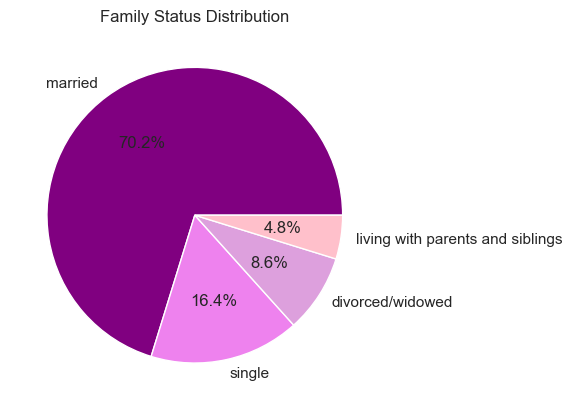

In [122]:
# Plotting pie chart with percentages

pie_fam_status=plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', colors=['purple', 'violet', 'plum', 'pink'])
# Adding title

plt.title('Family Status Distribution')

In [123]:
# Save figure

save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family.png')

In [124]:
# Making orders-family status -age group chart
# Create a dataframe to group the data by 'fam_status' and 'age_flag'

df_s_g = small.groupby(['fam_status', 'age_group']).size().unstack()

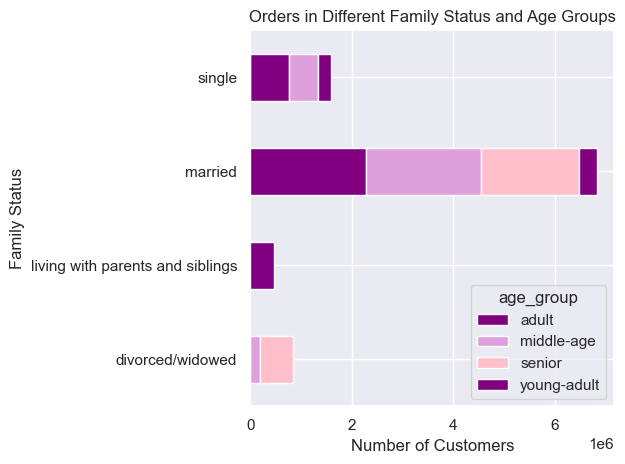

In [125]:
# Plot the data using a bar chart

colors = ['purple', 'plum','pink']
bar__age = df_s_g.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()

In [126]:
# Save figure

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_age.png'), bbox_inches='tight', pad_inches=0.1)

<Figure size 640x480 with 0 Axes>

In [127]:
# Export the sample data

small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_sample_data_set.pkl'))